In [1]:
import pandas as pd

#modeling
from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from classification_functions import logistic_model, knn_classification, conf_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#set the rc parameters
plt.style.use('ggplot')
plt.rc('font', size=10)

Load data

In [3]:
df = pd.read_pickle('../Data/survey_data_cleaned2.pkl')

### EDA

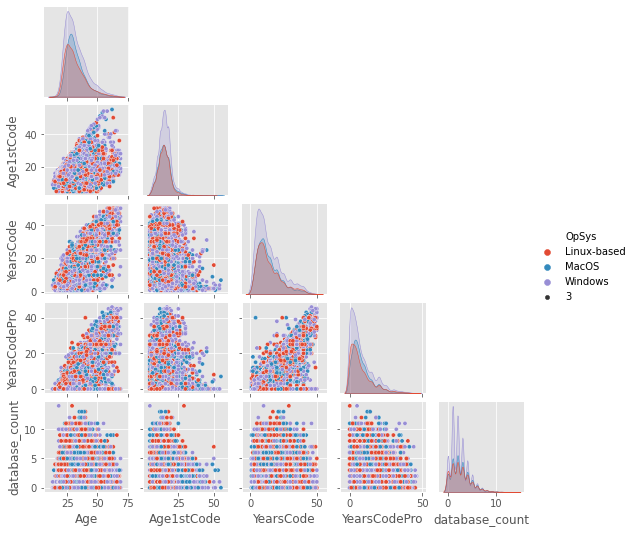

In [4]:
# We want to pick one feature to start that separates the two cases.
sns.pairplot(df[['OpSys', 'Age', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'database_count']], 
             corner=True, height=1.5, plot_kws={'size': 3}, hue='OpSys')

<ipython-input-5-dcd54bf2d3b6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


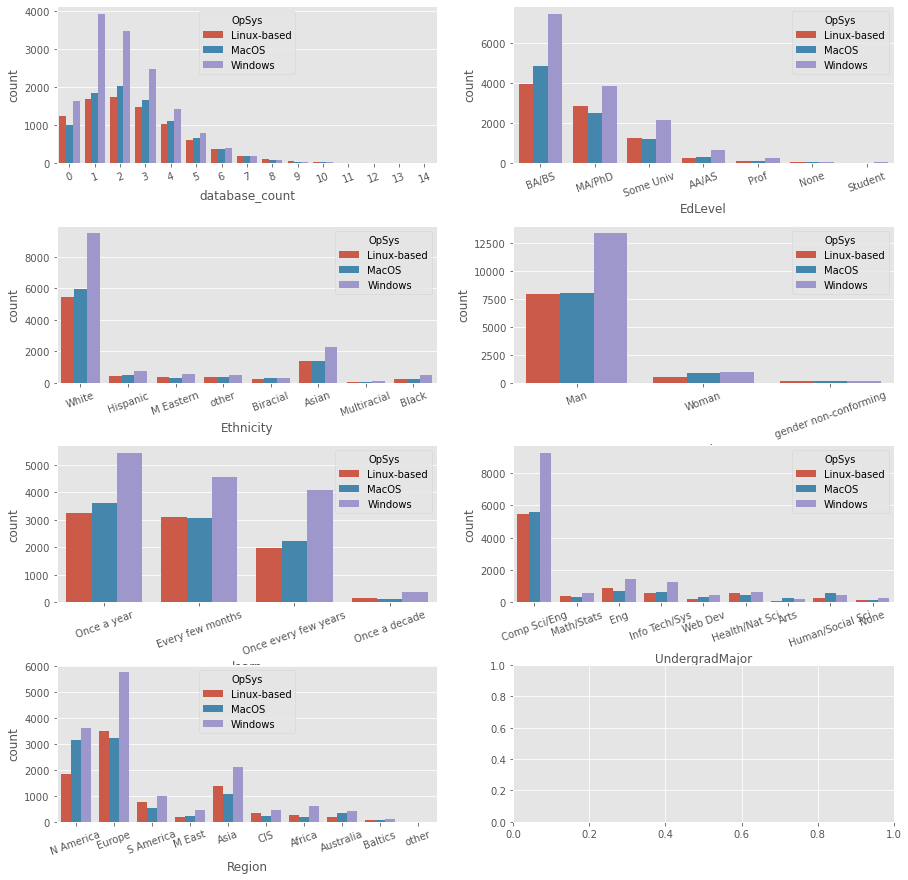

In [5]:
categorical_columns = ['database_count', 'EdLevel', 'Ethnicity', 'Gender', 'learn', 'UndergradMajor', 'Region']
fig, ax =plt.subplots(4,2, gridspec_kw={'hspace': 0.4, 'wspace': 0.2}, figsize=(15,15))
idx = 0
for x in range(0,4):
    for y in range(0,2):
        if idx >= 7:
            break
        sns.countplot(x = categorical_columns[idx], hue='OpSys', data=df, ax=ax[x,y])
        ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(),rotation=20)
        idx= idx+1
fig.show()

<ipython-input-12-9c9b35b1cc88>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


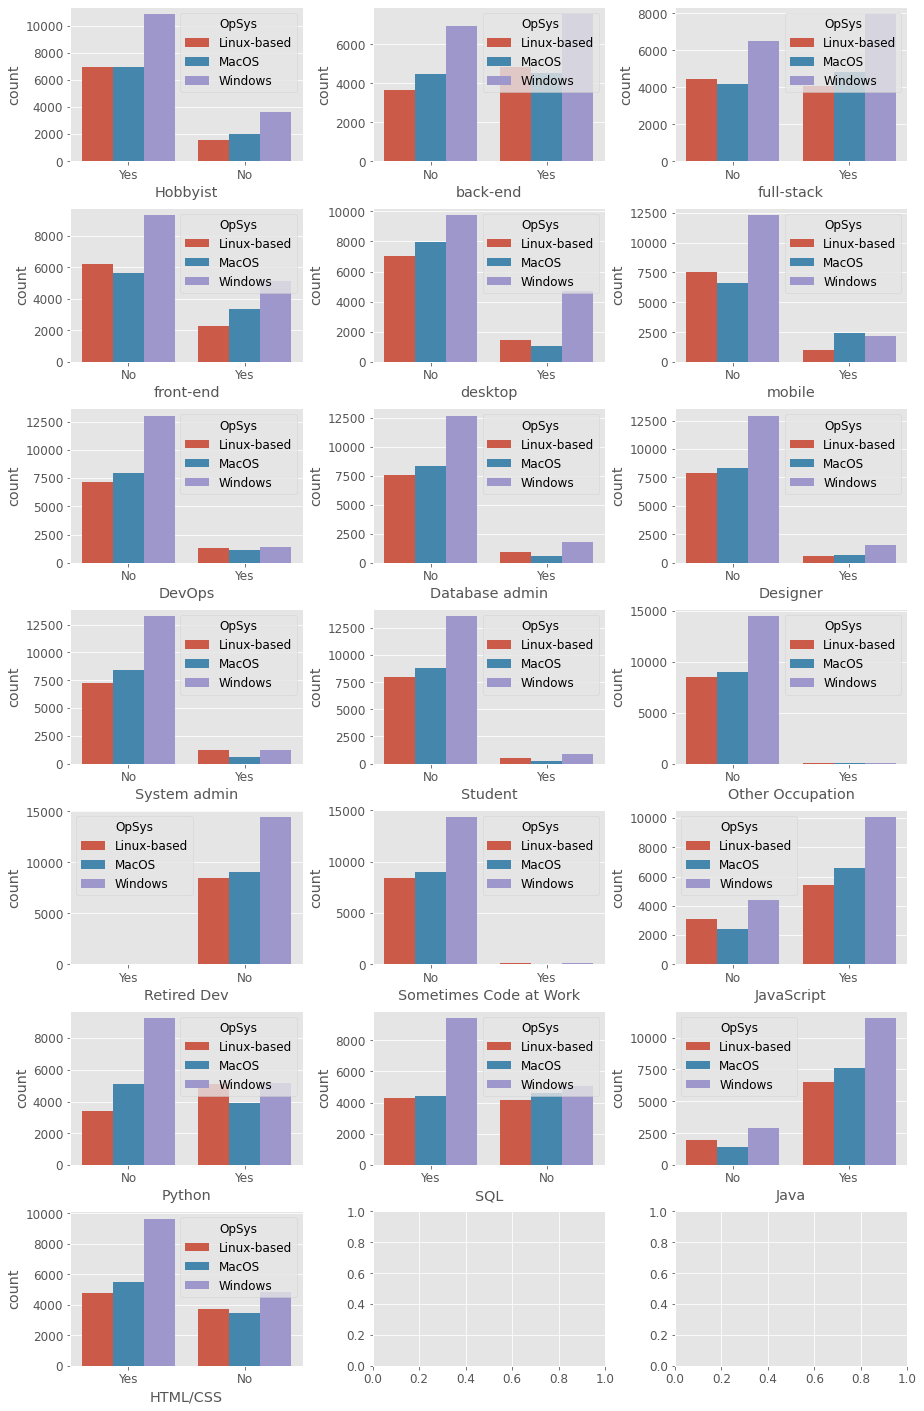

In [12]:
binary_columns = ['Hobbyist', 'back-end', 'full-stack', 'front-end', 'desktop', 'mobile', 'DevOps', 'Database admin', 'Designer',
                 'System admin', 'Student', 'Other Occupation', 'Retired Dev','Sometimes Code at Work',
                 'JavaScript', 'Python', 'SQL', 'Java', 'HTML/CSS']
fig, ax =plt.subplots(7,3, gridspec_kw={'hspace': 0.3, 'wspace': 0.3}, figsize=(15,25))
idx = 0
for x in range(0,7):
    for y in range(0,3):
        if idx >= 19:
            break
        sns.countplot(x = binary_columns[idx], hue='OpSys', data=df, ax=ax[x,y])
        idx= idx+1
fig.show()

### Baseline Modeling

In [7]:
X = df[['database_count', 'EdLevel', 'Ethnicity', 'Gender', 'learn', 'UndergradMajor', 'Region', 
        'Hobbyist', 'back-end', 'full-stack', 'front-end', 'desktop', 'mobile', 'DevOps', 'Database admin', 
        'Designer','System admin', 'Student', 'Other Occupation', 'Retired Dev','Sometimes Code at Work', 
       'JavaScript', 'Python', 'SQL', 'Java', 'HTML/CSS']]
y = df['OpSys']

X=pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#X.info()

0.5496538506668752
Windows        2878
MacOS          1832
Linux-based    1682
Name: OpSys, dtype: int64


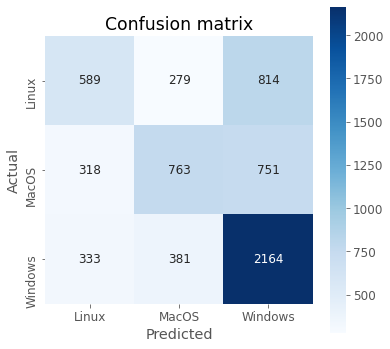

In [8]:
plt.rc('font', size=12)
lm_mn = logistic_model(X_train, y_train, 'multinomial')
conf_matrix(lm_mn, X_test, y_test)

0.6400438064692768
Windows        2878
MacOS          1832
Linux-based    1682
Name: OpSys, dtype: int64


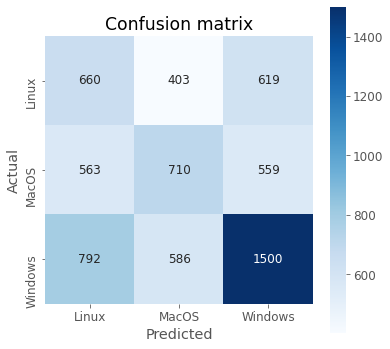

In [9]:
knn = knn_classification(X_train, y_train, 5)
conf_matrix(knn, X_test, y_test)